<a href="https://colab.research.google.com/github/kiannylim/SC1015-Data-Science-Project/blob/main/DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [ ]:
dataBeforeSampling = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataAfterSampling = pd.read_csv("sampledData.csv")

## **Exploratory Analysis** Before Sampling

### Categorical vs AttritionRate

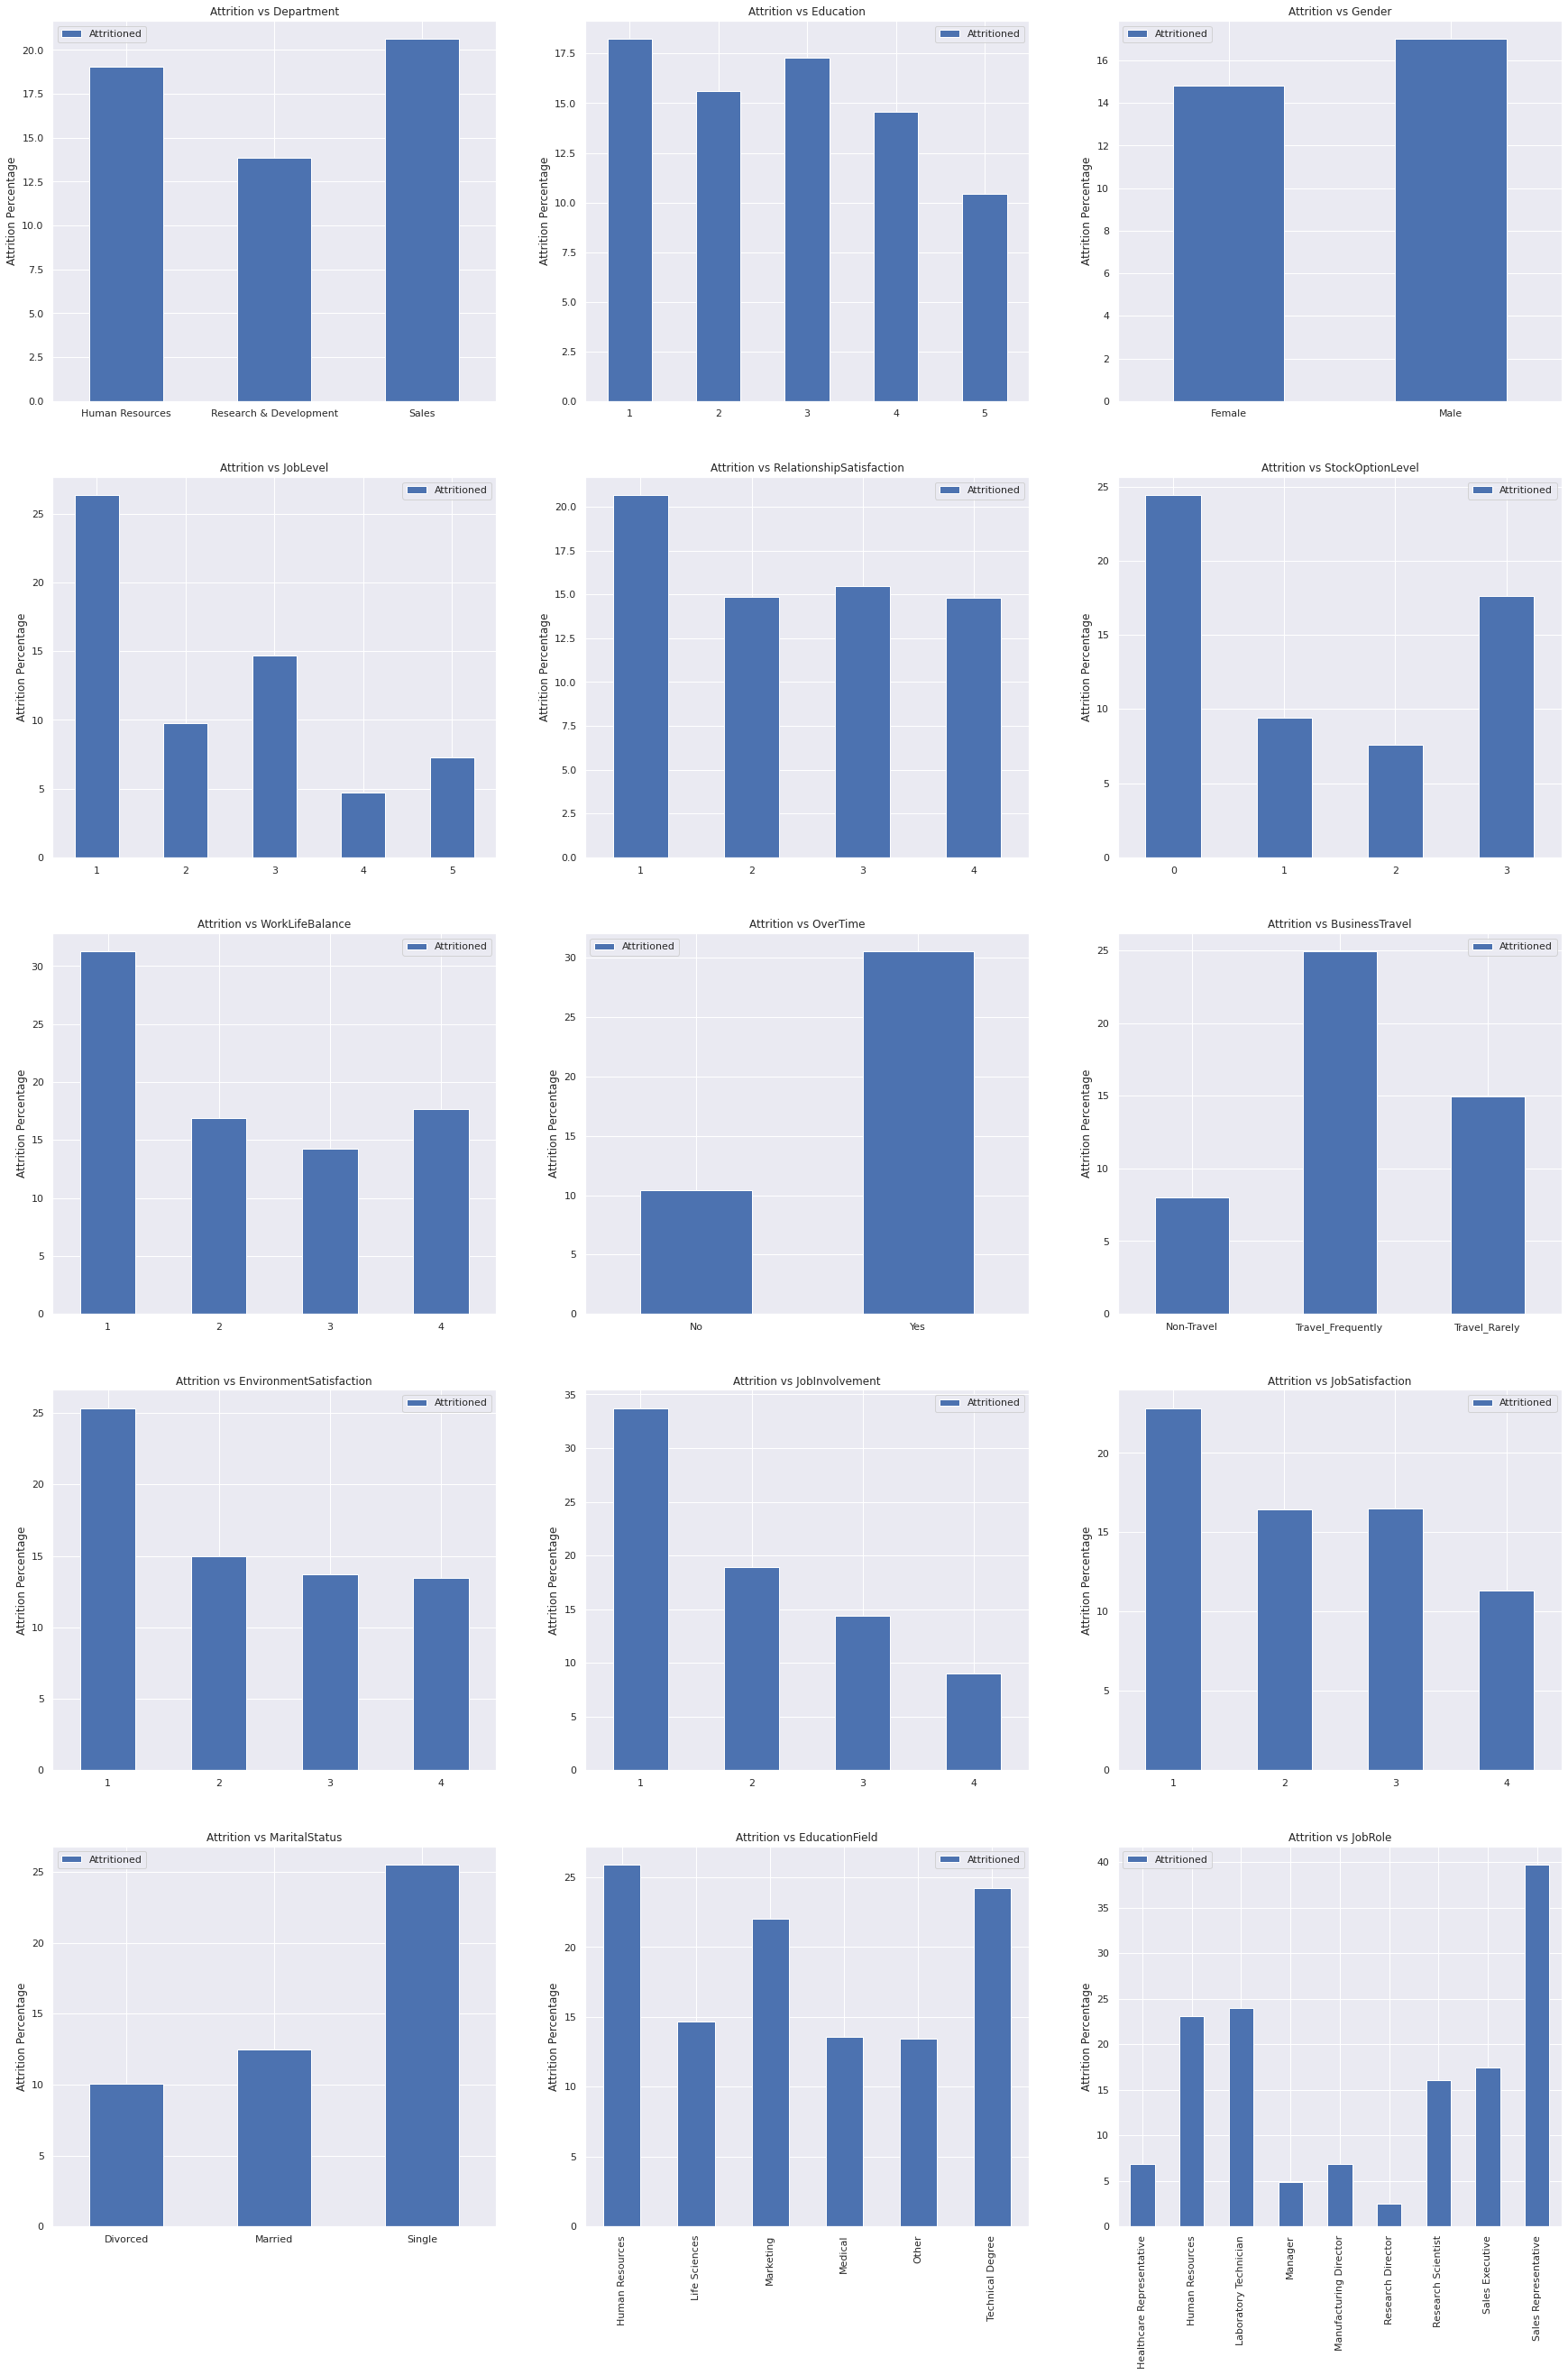

In [ ]:
data = dataBeforeSampling
listofvar = ["Department", "Education", "Gender", "JobLevel", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance" , "OverTime", "BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole"]
f,axes = plt.subplots(5,3,figsize=(30,45))
count = 0

for i in listofvar:
  comparing = i

  index = data[comparing].unique()
  attritioned = data.loc[(data["Attrition"] == "Yes")]
  not_attritioned = data.loc[(data["Attrition"] == "No")]
  percentAttrition, percentNotAttrition = [], []

  for i in index:
      attritioned_number = len(attritioned[attritioned[comparing] == i])
      not_attritioned_number = len(not_attritioned[not_attritioned[comparing] == i])
      total = attritioned_number + not_attritioned_number
      percentAttrition.append(attritioned_number/total * 100)
      percentNotAttrition.append(not_attritioned_number/total * 100)

  newdata = pd.DataFrame({'Attritioned':percentAttrition}, index = index).sort_index()
  if comparing in ["EducationField", "JobRole"]:
    ax = newdata.plot.bar(ax = axes[count//3][count%3])
  else:
    ax = newdata.plot.bar(rot = 0, ax = axes[count//3][count%3])
  ax.set_title("Attrition vs " + comparing)
  ax.set_ylabel("Attrition Percentage")
  count += 1

The other variables are quite ambiguous and does not seem to suggest so. The last 7 categorical variables "BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole" seems to suggest a linear trend with every different categorical value.

### Numeric variables comparison code

In [ ]:
rslt_df = data.loc[data['Attrition'] == "Yes"]
crucial_data = rslt_df[['YearsAtCompany','TotalWorkingYears','DailyRate','HourlyRate','MonthlyIncome',"MonthlyRate"]]
crucial_data

,YearsAtCompany,TotalWorkingYears,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate
0,6,8,1102,94,5993,19479
2,0,7,1373,92,2090,2396
14,4,6,103,50,2028,12947
21,5,10,1218,82,3407,6986
24,4,8,699,83,2960,17102
...,...,...,...,...,...,...
1438,1,1,638,33,1790,26956
1442,2,4,1092,36,4787,26124
1444,10,14,310,72,2339,3666
1452,6,12,878,94,6728,14255


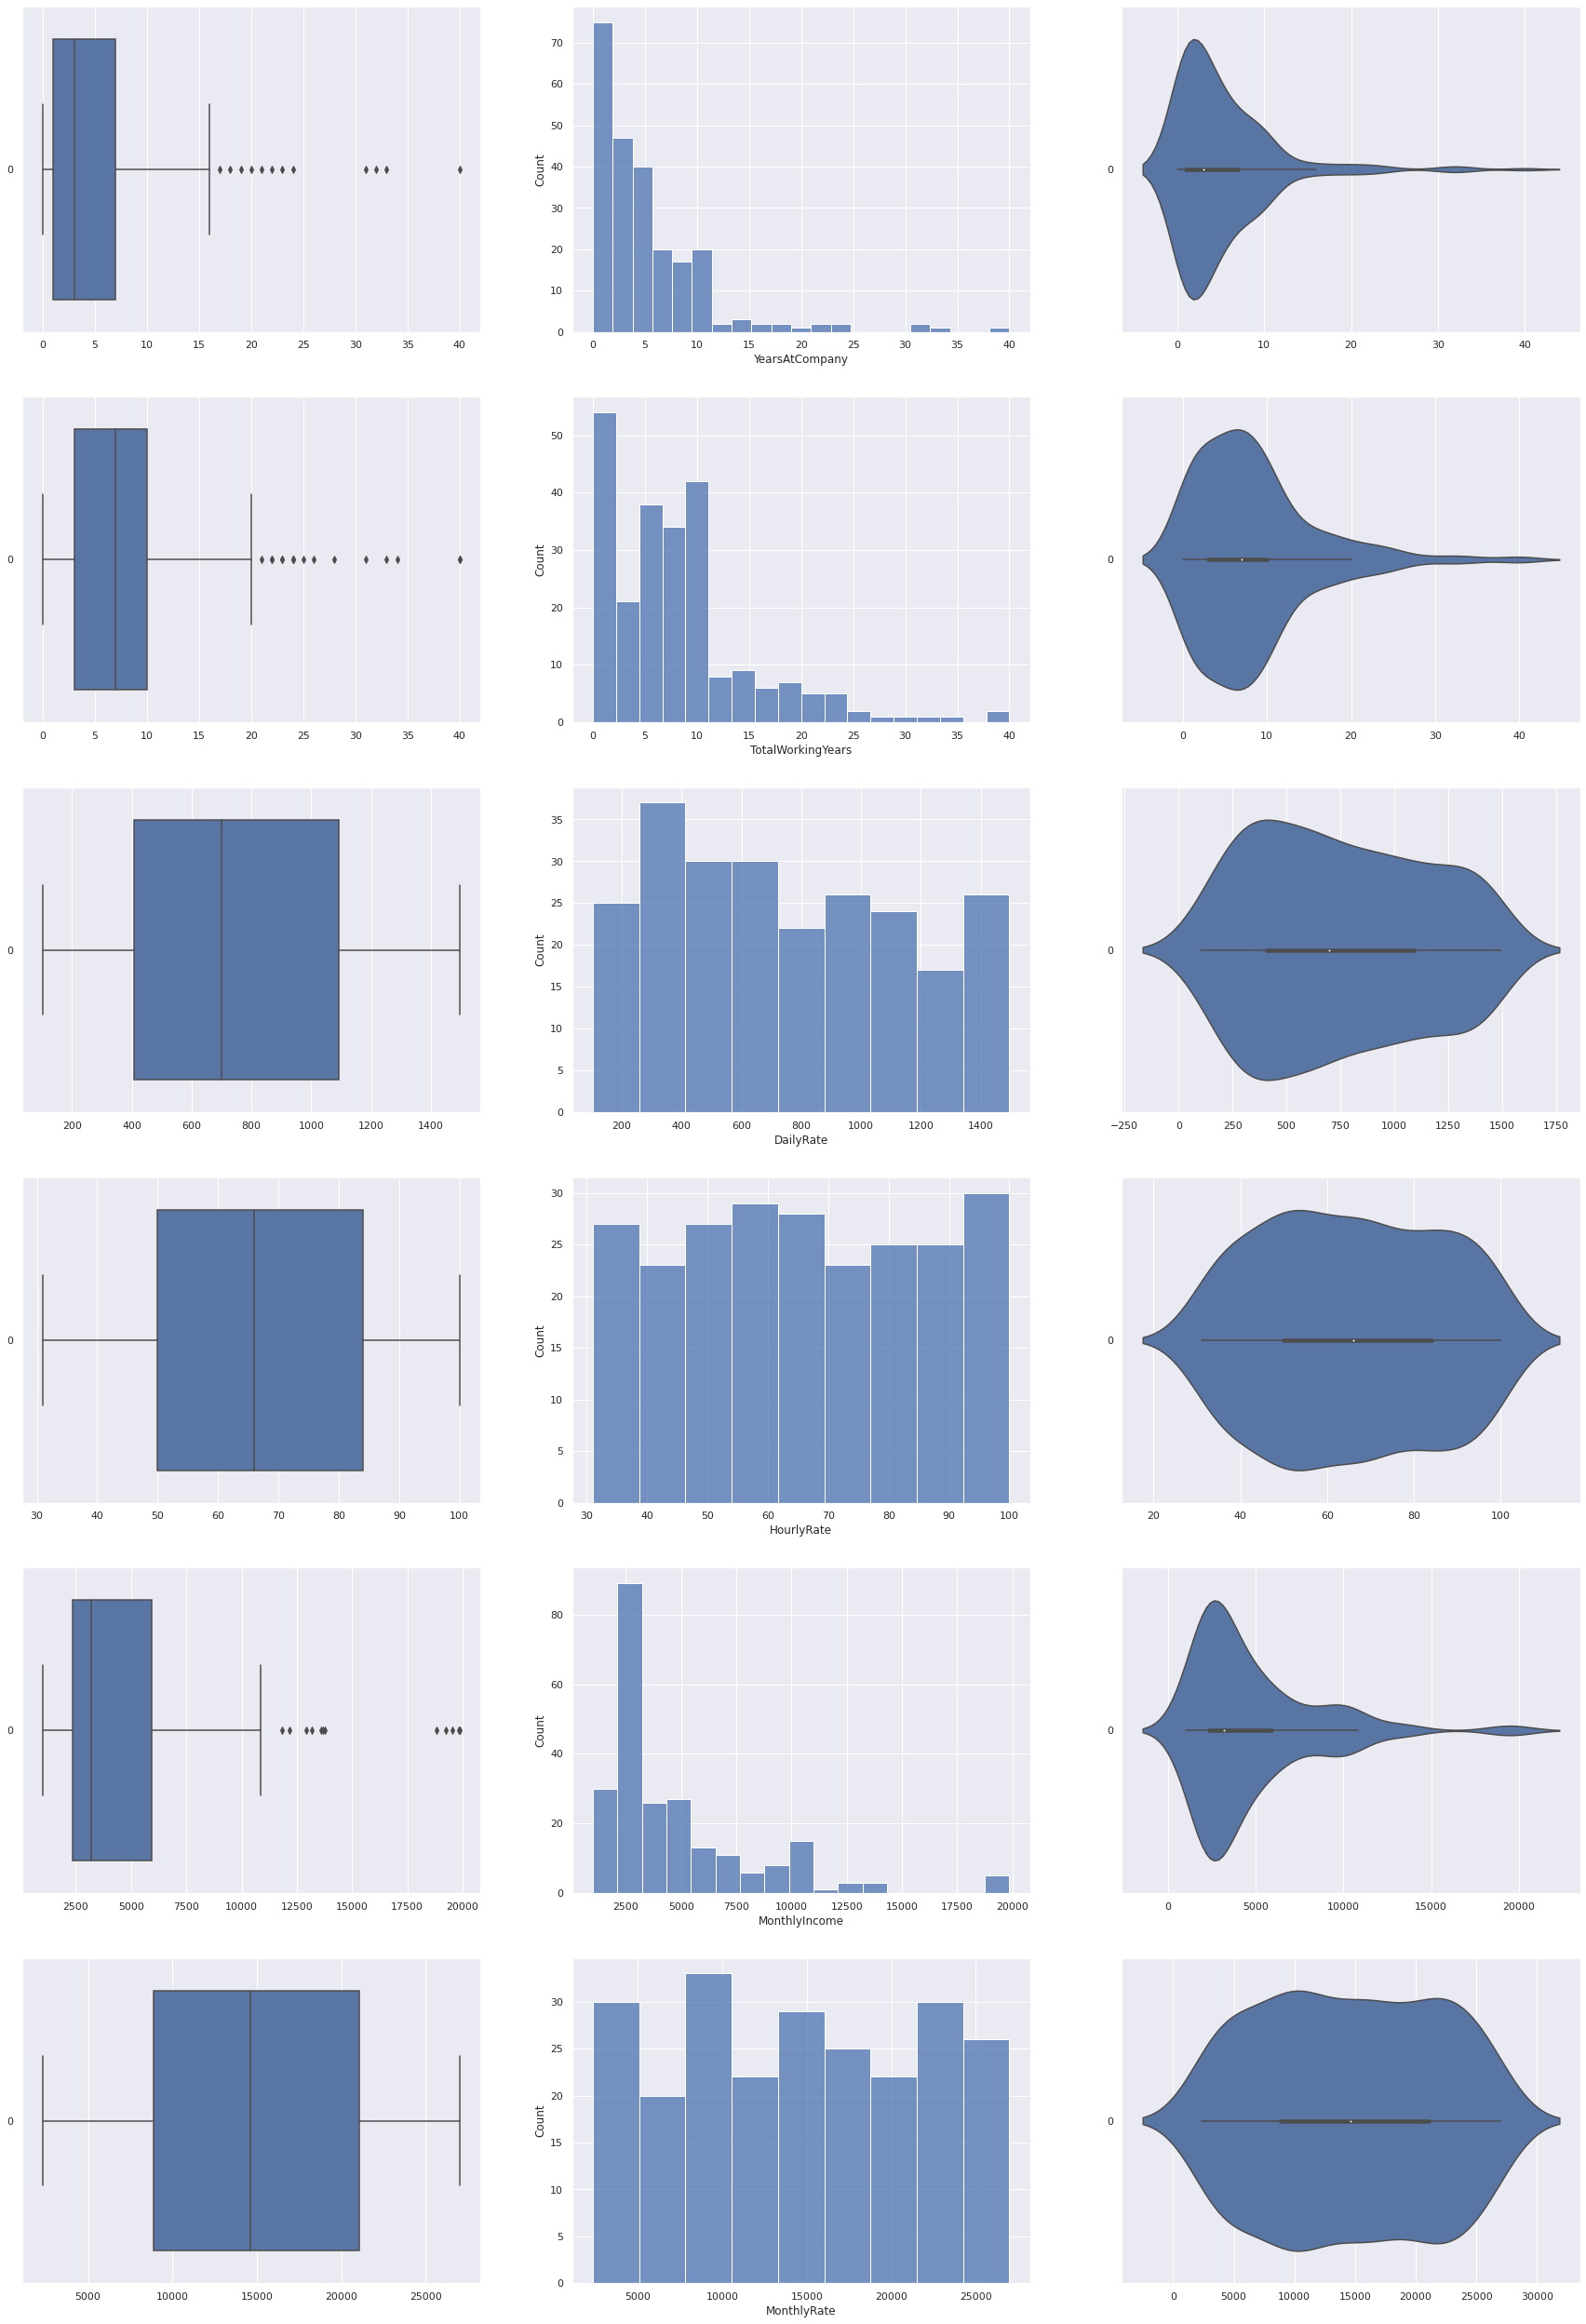

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(30, 45))

count = 0
for var in crucial_data:
    sb.boxplot(data = crucial_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = crucial_data[var], ax = axes[count,1])
    sb.violinplot(data = crucial_data[var], orient = "h", ax = axes[count,2])
    count += 1

## **Exploratory Analysis** After Sampling

### Categorical vs AttritionRate

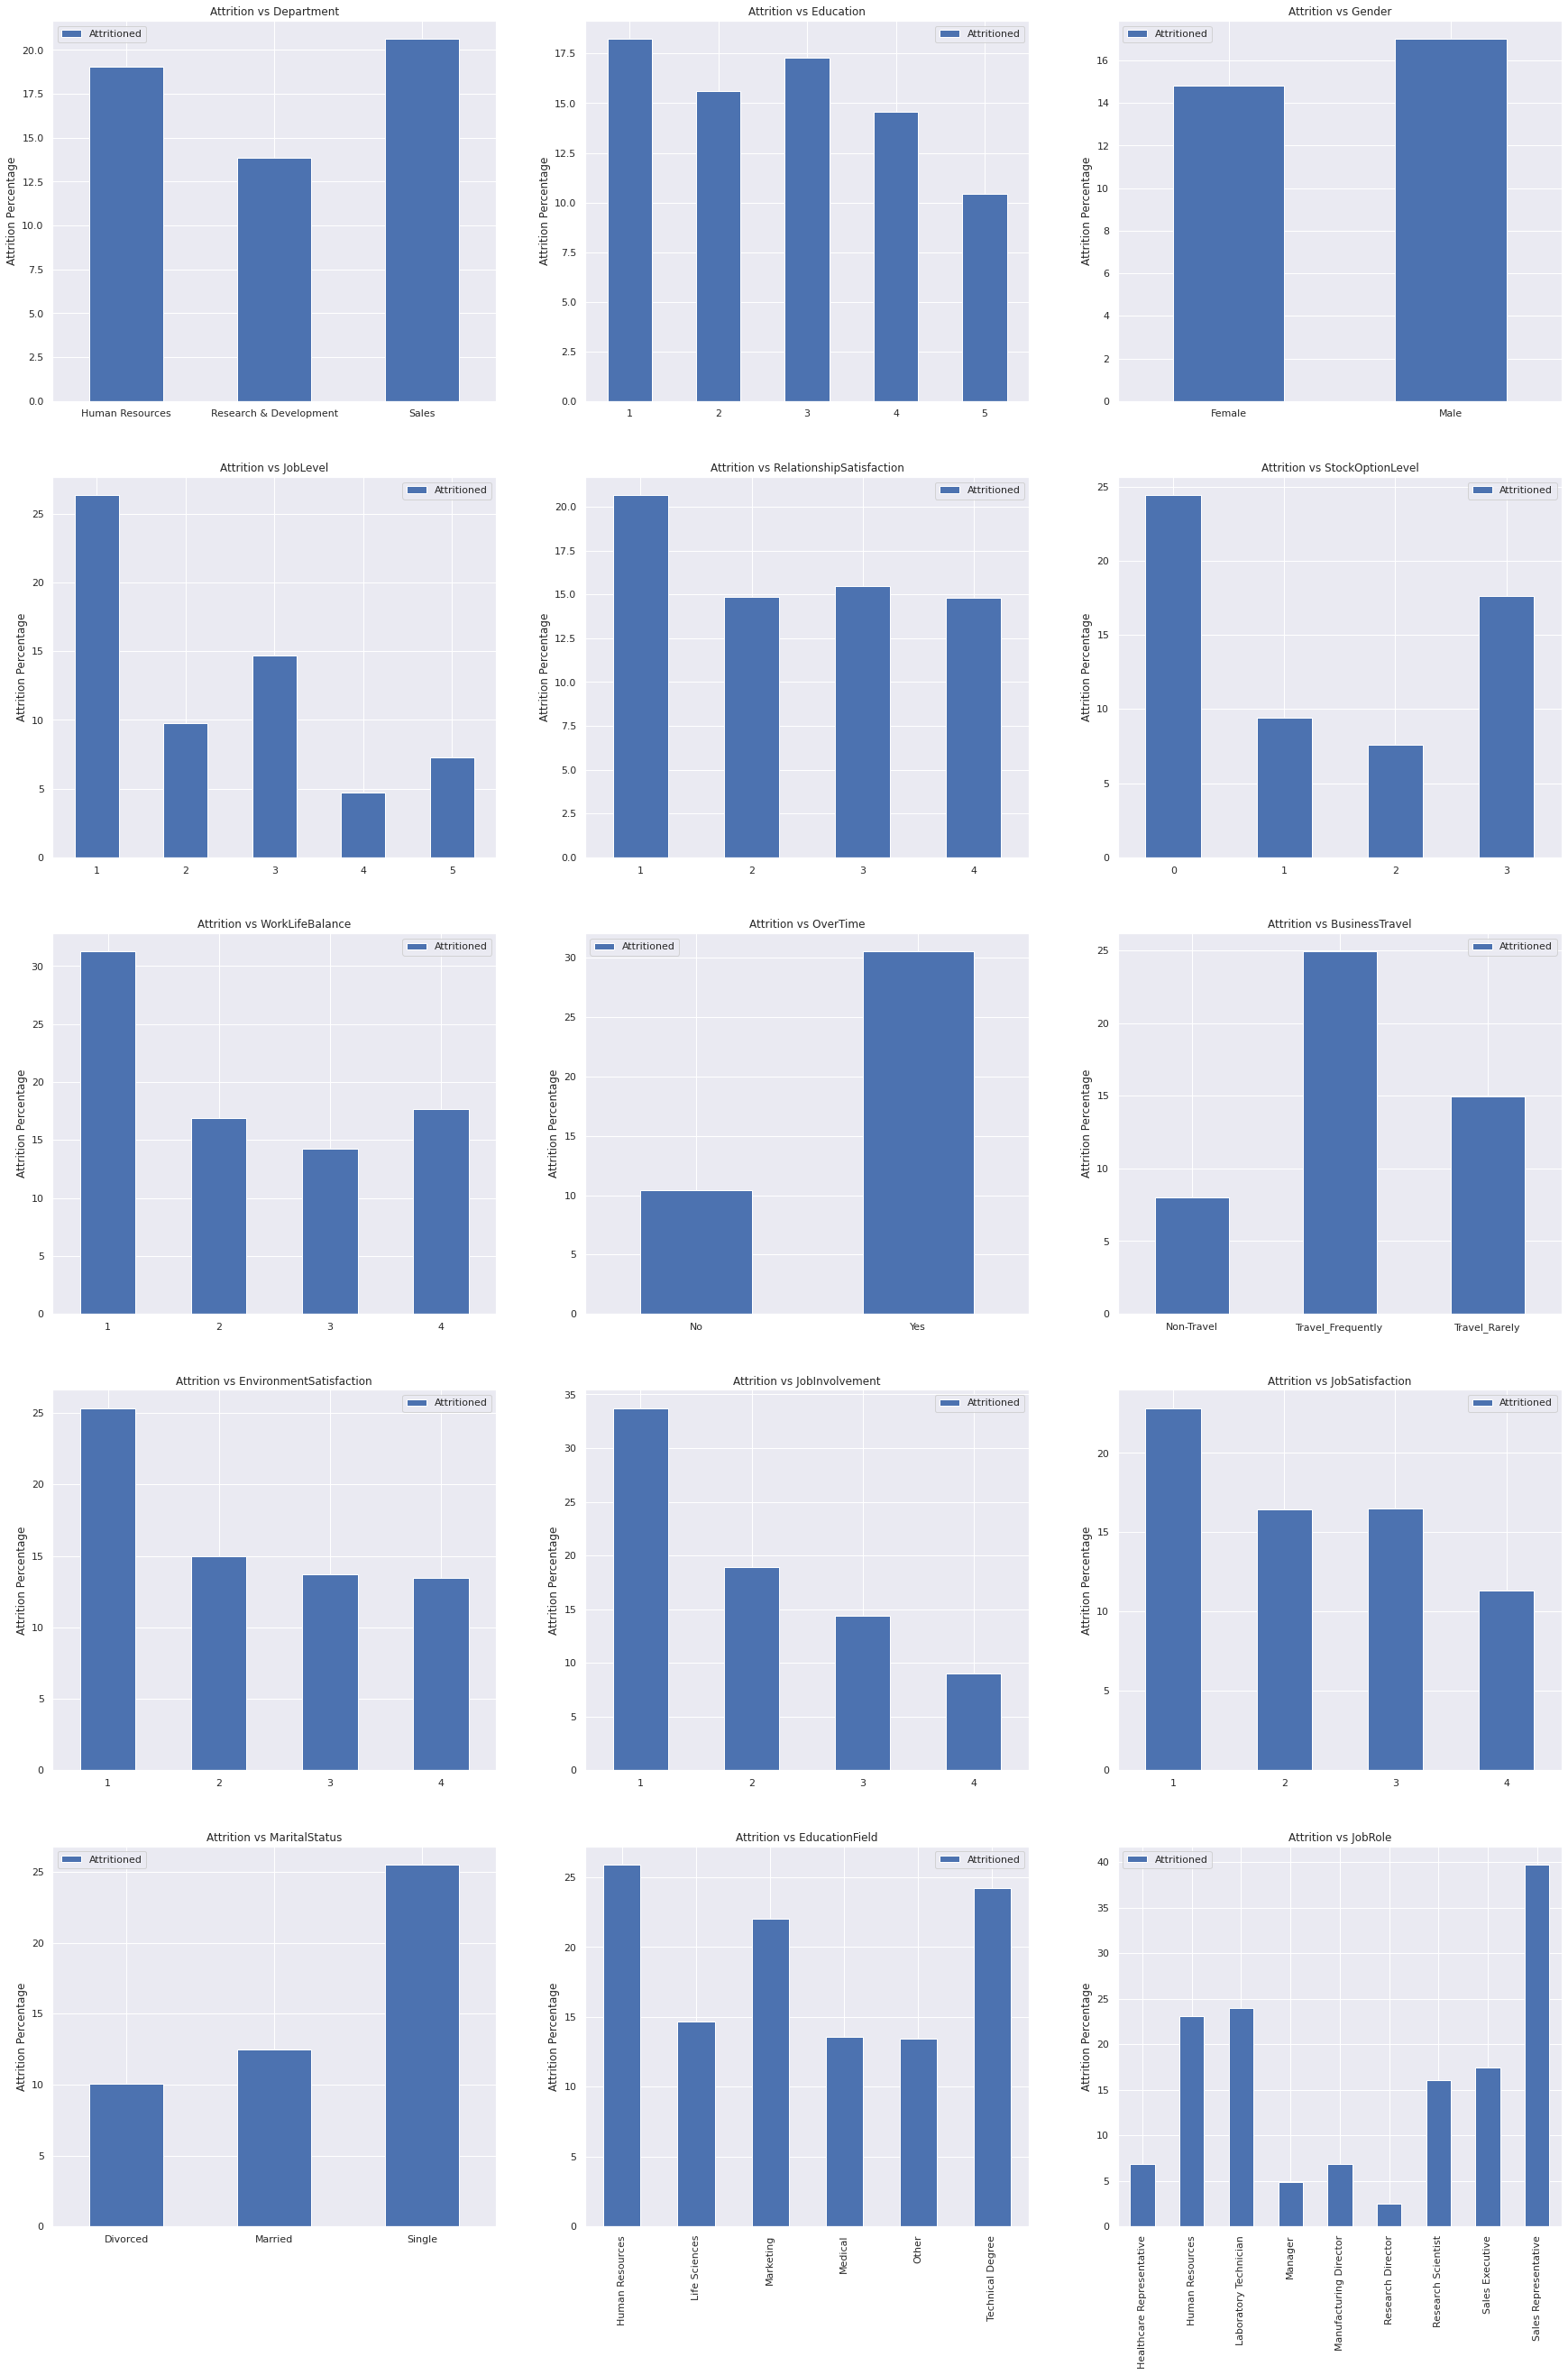

In [ ]:
data = dataAfterSampling
listofvar = ["Department", "Education", "Gender", "JobLevel", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance" , "OverTime", "BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole"]
f,axes = plt.subplots(5,3,figsize=(30,45))
count = 0

for i in listofvar:
  comparing = i

  index = data[comparing].unique()
  attritioned = data.loc[(data["Attrition"] == "Yes")]
  not_attritioned = data.loc[(data["Attrition"] == "No")]
  percentAttrition, percentNotAttrition = [], []

  for i in index:
      attritioned_number = len(attritioned[attritioned[comparing] == i])
      not_attritioned_number = len(not_attritioned[not_attritioned[comparing] == i])
      total = attritioned_number + not_attritioned_number
      percentAttrition.append(attritioned_number/total * 100)
      percentNotAttrition.append(not_attritioned_number/total * 100)

  newdata = pd.DataFrame({'Attritioned':percentAttrition}, index = index).sort_index()
  if comparing in ["EducationField", "JobRole"]:
    ax = newdata.plot.bar(ax = axes[count//3][count%3])
  else:
    ax = newdata.plot.bar(rot = 0, ax = axes[count//3][count%3])
  ax.set_title("Attrition vs " + comparing)
  ax.set_ylabel("Attrition Percentage")
  count += 1

The other variables are quite ambiguous and does not seem to suggest so. The last 7 categorical variables "BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole" seems to suggest a linear trend with every different categorical value.

### Numeric variables comparison code

In [ ]:
rslt_df = data.loc[data['Attrition'] == "Yes"]
crucial_data = rslt_df[['YearsAtCompany','TotalWorkingYears','DailyRate','HourlyRate','MonthlyIncome',"MonthlyRate"]]
crucial_data

,YearsAtCompany,TotalWorkingYears,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate
0,6,8,1102,94,5993,19479
2,0,7,1373,92,2090,2396
14,4,6,103,50,2028,12947
21,5,10,1218,82,3407,6986
24,4,8,699,83,2960,17102
...,...,...,...,...,...,...
1438,1,1,638,33,1790,26956
1442,2,4,1092,36,4787,26124
1444,10,14,310,72,2339,3666
1452,6,12,878,94,6728,14255


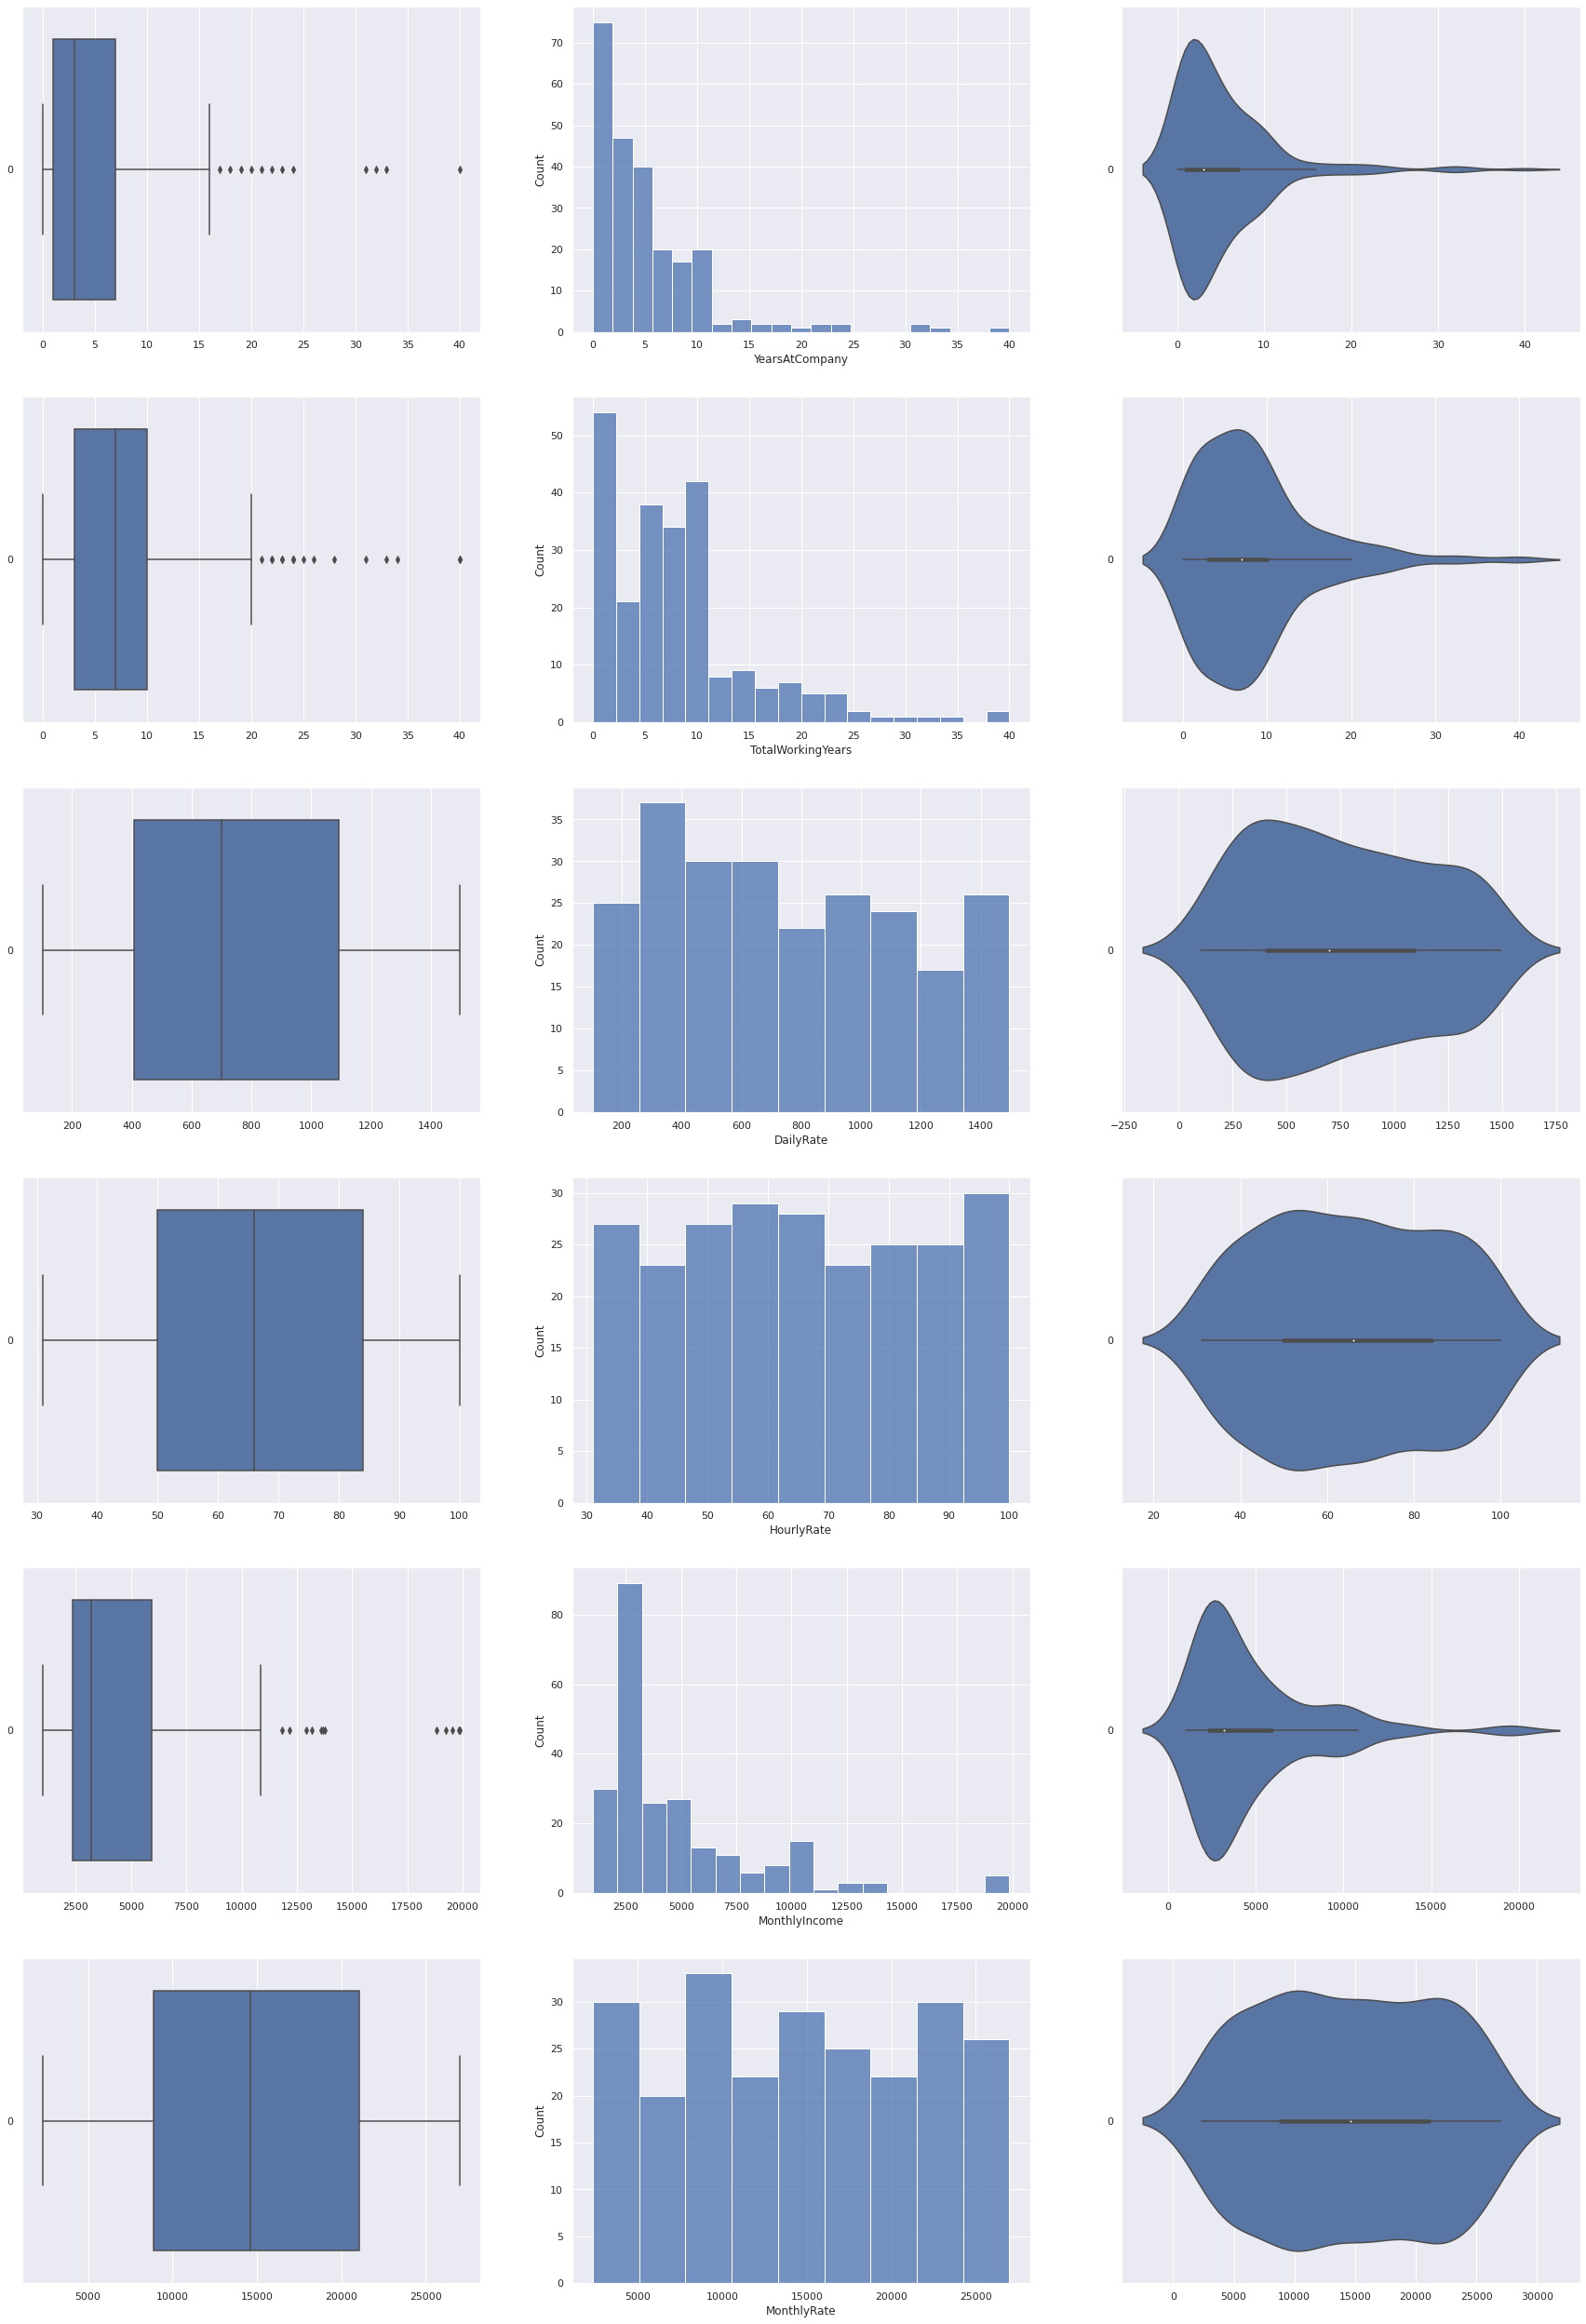

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(30, 45))

count = 0
for var in crucial_data:
    sb.boxplot(data = crucial_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = crucial_data[var], ax = axes[count,1])
    sb.violinplot(data = crucial_data[var], orient = "h", ax = axes[count,2])
    count += 1